In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [2]:
# read in data
df = pd.read_csv("../data/cleaned_data/cleaned.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,1,1,0,4,4,4,0,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,1,1,1,1,1,4,1,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,1,0,1,1,1,4,1,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,1,1,1,4,2,3,2,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# set up training, validation, and test sets
X = df.iloc[:,:32]
Y = df.iloc[:,32]

In [4]:
Xtrain, Xtest, Ytrain, ytest = train_test_split(X, Y, test_size = 0.26, shuffle = True, random_state = 13)

In [5]:
xtrain, xval, ytrain, yval = train_test_split(Xtrain, Ytrain, test_size = 0.5, shuffle = True, random_state = 13)

In [6]:
# fit unregularized linear regression model
lm = LinearRegression()
lm.fit(xtrain, ytrain)

## create MSE function
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

print("===Performance on training set===")
print("Training error:", mean_squared_err(ytrain, lm.predict(xtrain)))
print("R-squared:", round(lm.score(xtrain, ytrain), 3))
print()
print("===Performance on validation set===")
print("Validation error:", mean_squared_err(yval, lm.predict(xval)))
print("R-squared:", round(lm.score(xval, yval), 3))

===Performance on training set===
Training error: 2.481157998795698
R-squared: 0.895

===Performance on validation set===
Validation error: 5.572302870116987
R-squared: 0.781


In [72]:
# fit L-1 regularized (Lasso) linear regression model
## apply cross validation to choose best alpha
parameters = {'alpha':(range(1, 21, 1))}
l1_lm = Lasso()
cv = GridSearchCV(l1_lm, parameters)
cv.fit(xtrain, ytrain)
print("Best alpha is:", cv.best_params_)

Best alpha is: {'alpha': 1}


In [8]:
l1_best = Lasso(alpha=1)
l1_best.fit(xtrain, ytrain)

print("===Performance on training set===")
print("Training error:", mean_squared_err(ytrain, l1_best.predict(xtrain)))
print("R-squared:", round(l1_best.score(xtrain, ytrain), 3))
print()
print("===Performance on validation set===")
print("Validation error:", mean_squared_err(yval, l1_best.predict(xval)))
print("R-squared:", round(l1_best.score(xval, yval), 3))

===Performance on training set===
Training error: 3.692358862991513
R-squared: 0.844

===Performance on validation set===
Validation error: 4.666219463984615
R-squared: 0.816


In [80]:
# fit L-2 regularized (Ridge) linear regression model
## apply cross validation to choose best alpha
l2 = Ridge()
cv = GridSearchCV(l2, parameters)
cv.fit(xtrain, ytrain)
print("Best alpha is:", cv.best_params_)

Best alpha is: {'alpha': 20}


In [10]:
l2_best = Ridge(alpha=20)
l2_best.fit(xtrain, ytrain)

print("===Performance on training set===")
print("Training error:", mean_squared_err(ytrain, l2_best.predict(xtrain)))
print("R-squared:", round(l2_best.score(xtrain, ytrain), 3))
print()
print("===Performance on validation set===")
print("Validation error:", mean_squared_err(yval, l2_best.predict(xval)))
print("R-squared:", round(l2_best.score(xval, yval), 3))

===Performance on training set===
Training error: 2.586508130199553
R-squared: 0.891

===Performance on validation set===
Validation error: 5.066755288157446
R-squared: 0.8


In [50]:
# fit L1+L2 regularized (Elastic Net) linear regression model
## apply cross validation to choose best alpha
parameters = {'alpha':(range(1, 21, 1)),
              'l1_ratio':(np.arange(0.1, 1.0, 0.1))}
elastic = ElasticNet()
cv = GridSearchCV(elastic, parameters)
cv.fit(xtrain, ytrain)
print("Best parameters are:", cv.best_params_)

Best parameters are: {'alpha': 1, 'l1_ratio': 0.20000000000000001}


In [63]:
alpha_list = range(1, 21, 1)
l1ratio_list = np.arange(0.1, 1.0, 0.1)
train_score_a = []
val_score_a = []
train_score_r = []
val_score_r = []

for a in alpha_list:
    en = ElasticNet(alpha=a)
    en.fit(xtrain, ytrain)
    train_score_a.append(en.score(xtrain, ytrain))
    val_score_a.append(en.score(xval, yval))

for r in l1ratio_list:
    en = ElasticNet(l1_ratio=r)
    en.fit(xtrain, ytrain)
    train_score_r.append(en.score(xtrain, ytrain))
    val_score_r.append(en.score(xval, yval))

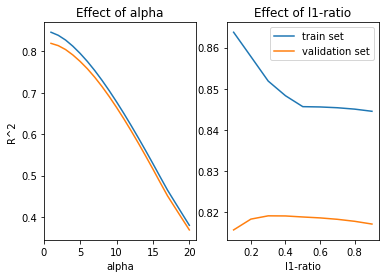

In [71]:
# plot out effects of alpha and l1-ratio on Elastic Net model's performance
plt.subplot(1, 2, 1)
plt.plot(alpha_list, train_score_a, label = "train set")
plt.plot(alpha_list, val_score_a, label = "validation set")
plt.title("Effect of alpha")
plt.xlabel("alpha")
plt.ylabel("R^2")
# plt.legend()

plt.subplot(1, 2, 2)
plt.plot(l1ratio_list, train_score_r, label = "train set")
plt.plot(l1ratio_list, val_score_r, label = "validation set")
plt.title("Effect of l1-ratio")
plt.xlabel("l1-ratio")
# plt.ylabel("R^2")
plt.legend()
plt.savefig("../graphs/elastic_params.png")

In [40]:
l1l2 = ElasticNet(alpha=1, l1_ratio=0.2)
l1l2.fit(xtrain, ytrain)

print("===Performance on training set===")
print("Training error:", mean_squared_err(ytrain, l1l2.predict(xtrain)))
print("R-squared:", round(l1l2.score(xtrain, ytrain), 3))
print()
print("===Performance on validation set===")
print("Validation error:", mean_squared_err(yval, l1l2.predict(xval)))
print("R-squared:", round(l1l2.score(xval, yval), 3))

===Performance on training set===
Training error: 3.3603903264325257
R-squared: 0.858

===Performance on validation set===
Validation error: 4.613037254632307
R-squared: 0.818


In [13]:
# find AIC for each model
resid_sum_squared = lambda y, yhat: np.sum(y - np.mean(yhat))**2

In [14]:
def AIC_val(model):
    N = df.shape[0]
    RSS = resid_sum_squared(yval, model.predict(xval))
    k = model.coef_.nonzero()[0].size
    AIC = N*np.log(RSS/N) + 2*k
    return AIC

In [41]:
models = ['Unregularized', 'Lasso', 'Ridge', 'Elastic Net']
rsquared = [round(lm.score(xval, yval), 3), round(l1_best.score(xval, yval), 3), round(l2_best.score(xval, yval), 3), round(l1l2.score(xval, yval), 3)]
MSE = [mean_squared_err(yval, lm.predict(xval)),mean_squared_err(yval, l1_best.predict(xval)),mean_squared_err(yval, l2_best.predict(xval)),mean_squared_err(yval, l1l2.predict(xval))]
AIC = [AIC_val(lm), AIC_val(l1_best), AIC_val(l2_best), AIC_val(l1l2)]

In [42]:
# create summary table for models applied on validation set
d = {"model": models, "rsquared" : rsquared, "MSE": MSE, "AIC" : AIC}
pd.DataFrame(d, columns=["model", "rsquared", "MSE", "AIC"]).sort_values(['AIC'])

,model,rsquared,MSE,AIC
0,Unregularized,0.781,5.572303,-1542.916865
2,Ridge,0.800,5.066755,-1518.598585
1,Lasso,0.816,4.666219,-947.992891
3,Elastic Net,0.818,4.613037,-846.269980


In [44]:
# I choose Ridge model.
## print out the coefficients kept in the best model
for n in l1l2.coef_.nonzero()[0]:
    print(df.columns[n])

age
Medu
Mjob
failures
famrel
goout
absences
G1
G2


In [47]:
# fit model to test set and check test scores
def AIC_test(model):
    N = df.shape[0]
    RSS = resid_sum_squared(ytest, model.predict(Xtest))
    k = model.coef_.nonzero()[0].size
    AIC = N*np.log(RSS/N) + 2*k
    return AIC

l1l2_final = ElasticNet(alpha=1, l1_ratio=0.2)
l1l2_final.fit(xtrain, ytrain)
print("R^2:", l1l2.score(Xtest, ytest))
print("MSE:", mean_squared_err(ytest, lm.predict(Xtest)))
print("AIC:", AIC_test(l1l2))

R^2: 0.76864022454
MSE: 4.497932019898304
AIC: 691.322286166


In [78]:
l1l2_final.coef_

array([-0.        , -0.        , -0.06274616,  0.        , -0.        ,
       -0.        ,  0.04785257,  0.        , -0.00998494, -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.11907197,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.16828397,  0.        ,
        0.05633582, -0.        ,  0.        , -0.        ,  0.01811671,
        0.2457609 ,  0.89746202])

In [79]:
l1l2_final.intercept_

-1.9794189527360349

In [81]:
resid = ytest - l1l2_final.predict(Xtest)

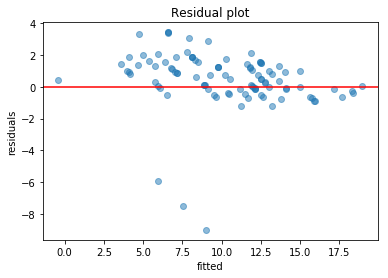

In [91]:
plt.scatter(l1l2_final.predict(Xtest), resid, alpha = 0.5)
plt.axhline(color = "red")
plt.title("Residual plot")
plt.xlabel("fitted")
plt.ylabel("residuals")
plt.savefig("../graphs/resid_plot.png")